In [1]:
import math
import random
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

In [2]:
#%% Constants

POPULATION_SIZE = 200000

In [3]:
def plot_sample_average_histogram(population, sample_size, target_gaussian_mu, target_gaussian_var, num_samples=1000, num_bins=50):
    avg_list = []

    for _ in range(num_samples):
        samples = np.random.choice(population, sample_size)
        sample_avg = np.mean(samples)
        avg_list.append(sample_avg)

    x = np.linspace(min(avg_list) - 0.1, max(avg_list) + 0.1, 100)

    plt.figure(figsize=(10, 7))
    gaussian = stats.norm.pdf(x, target_gaussian_mu, np.sqrt(target_gaussian_var/ sample_size))
    hist_scale_factor = np.max(gaussian) / (np.max(np.histogram(avg_list, bins=num_bins)[0]))
    sns.histplot(x=avg_list, bins=num_bins, label="Hist of sample average", weights=np.ones_like(avg_list) * hist_scale_factor)
    sns.lineplot(x=x, y=gaussian, color="r", label="Gaussian")
    plt.xlabel("Average")
    plt.title("Sample Average Hist")
    plt.legend()
    plt.show()

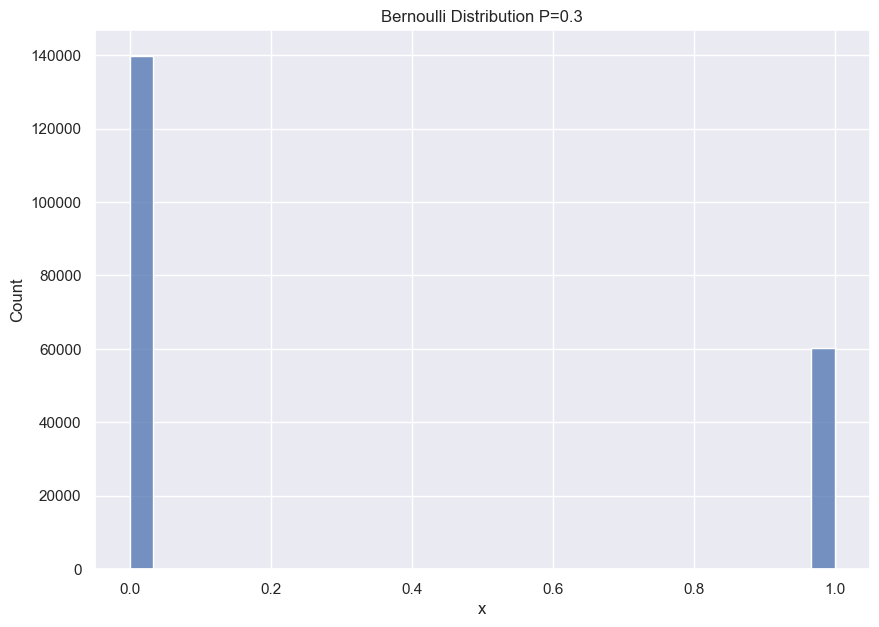

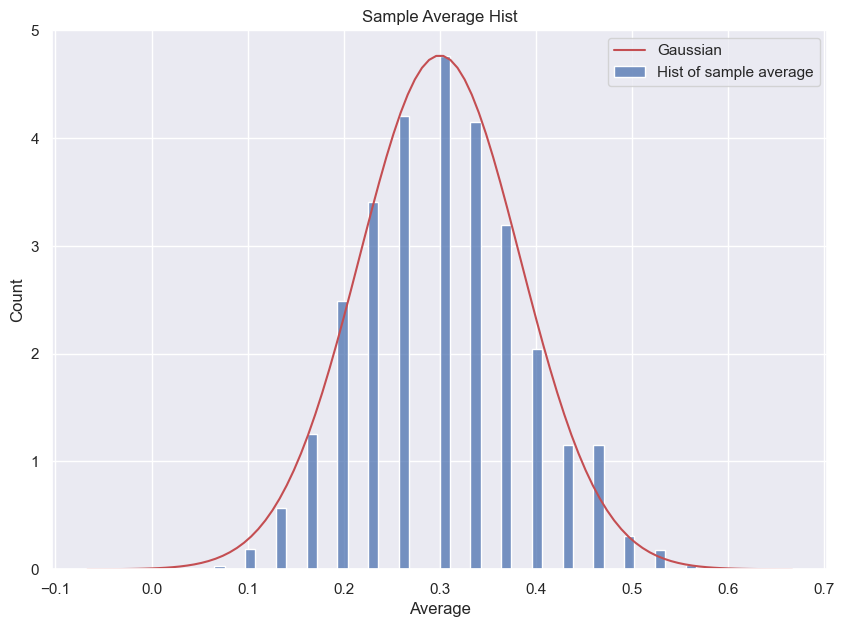

In [4]:
# Bernoulli

P = 0.3

pop = [1 if random.random() < P else 0 for _ in range(POPULATION_SIZE)]
pop = np.array(pop)

plt.figure(figsize = (10, 7))
sns.histplot(x = pop)
plt.xlabel("x")
plt.title(f"Bernoulli Distribution P={P}")
plt.show()

plot_sample_average_histogram(pop, 30, P, P*(1-P), num_samples=2000)

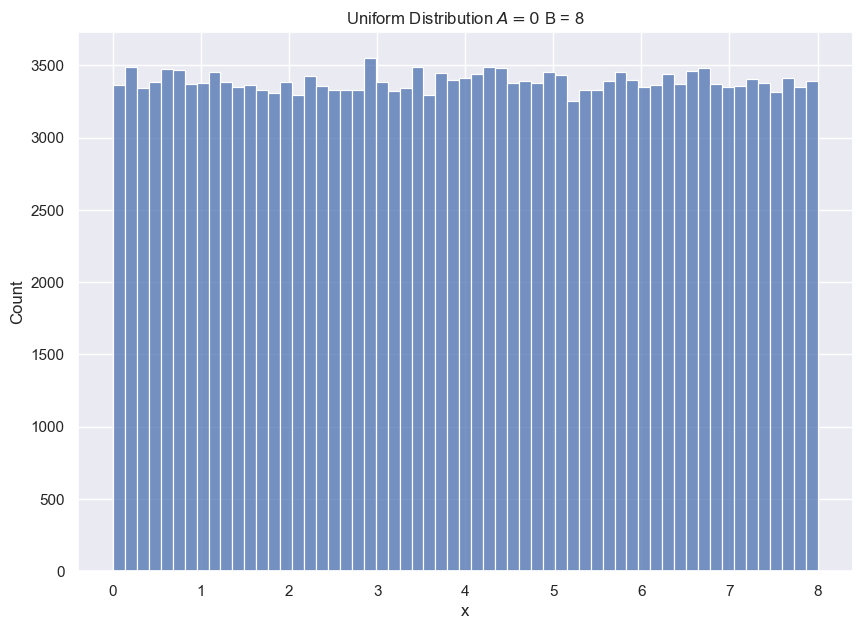

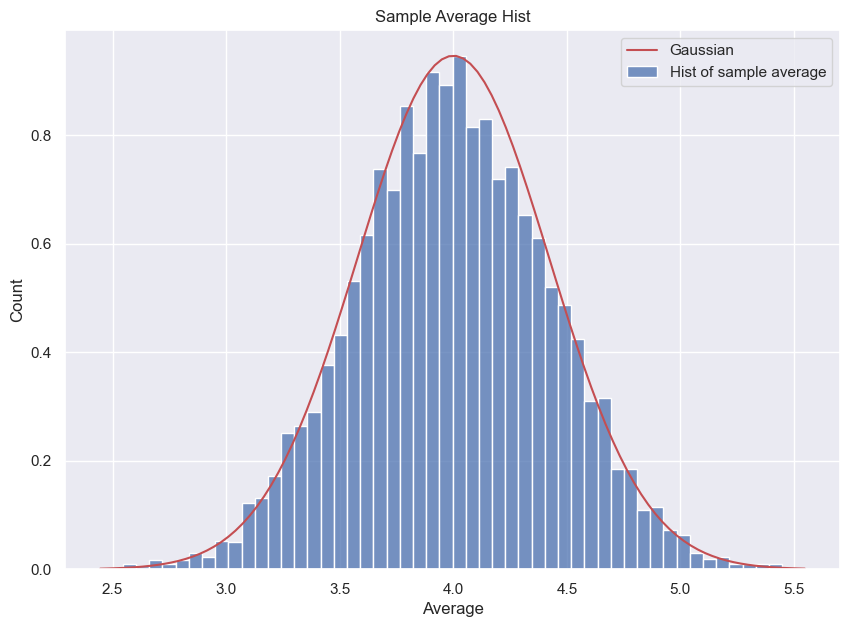

In [7]:
#%% Uniform

A = 0
B = 8

pop = np.random.uniform(A, B, POPULATION_SIZE)

plt.figure(figsize = (10, 7))
sns.histplot(x = pop)
plt.xlabel("x")
plt.title(r"Uniform Distribution $A = 0$ B = 8")
plt.show()

mu, var = 0.5*(A+B), ((B - A)**2)/12
plot_sample_average_histogram(pop, 30, mu, var, num_samples=5000)

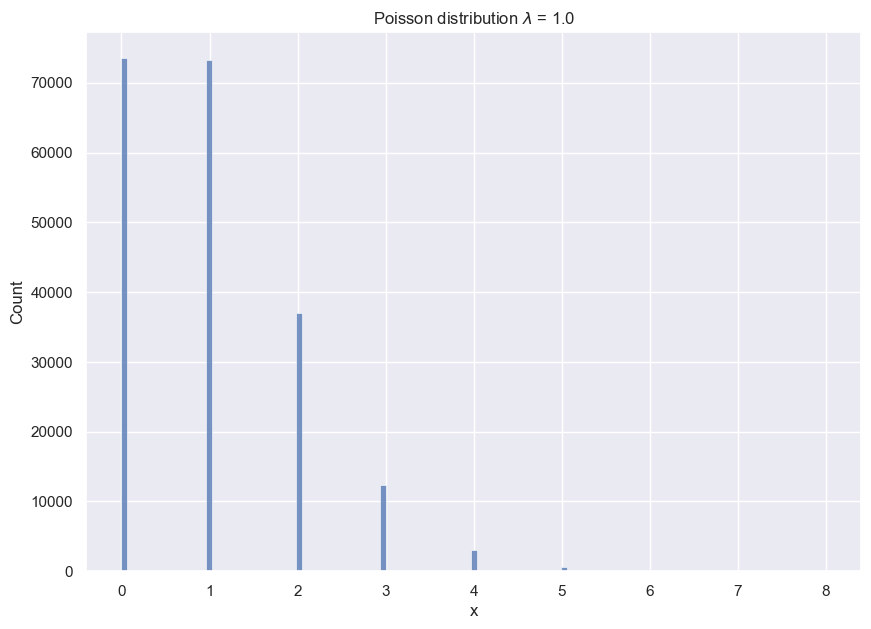

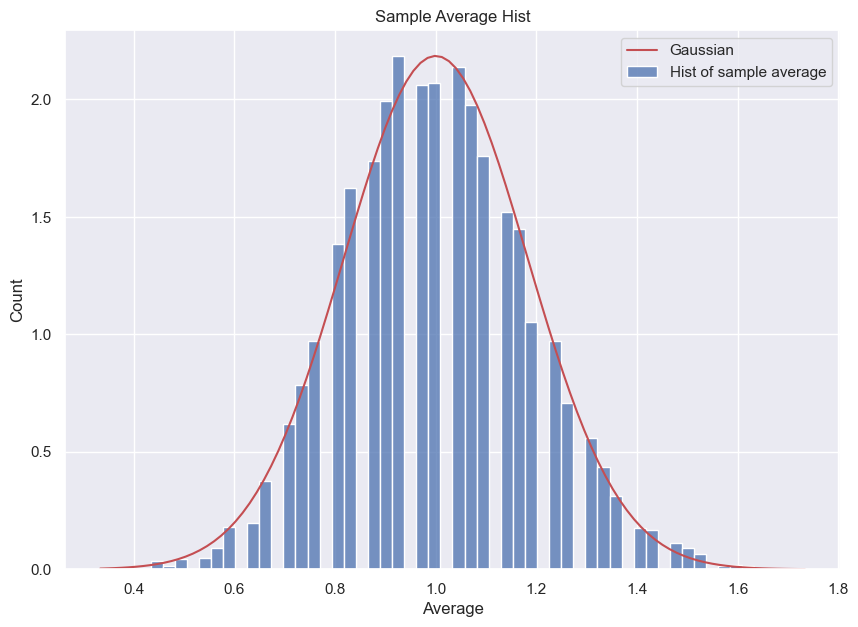

In [8]:
#%% Poisson

lmbda = 1.0

pop = np.random.poisson(lmbda, size=POPULATION_SIZE)

plt.figure(figsize = (10, 7))
sns.histplot(x = pop)
plt.xlabel("x")
plt.title(r"Poisson distribution $\lambda$ = " + str(lmbda))
plt.show()

mu, var = lmbda, lmbda
plot_sample_average_histogram(pop, 30, mu, var, num_samples=5000)